In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Imon.xlsx')

In [3]:
data

,Пол,Возраст,Семейное положение,Национальность,Повторный клиент,Сумма выдачи номинал,Дата выдачи,Дата окончание срока,Валюта,Срок,...,Цель кредита,Просрочки за цикл (кумулятивный),Длительность самой долгой единовременной просрочки в течение цикла,Просрочки на дату 07.06.2021,Льготный период,Дата списания,Сумма списания,Unnamed: 20,id,year
0,Муж,05.07.1985,Married,Таджик,Старый клиент,15000.0,25.12.2019,03.02.2022,USD,24,...,Оборотный капитал,1,1,0,0,00.00.0000,NaN,NaN,NaN,1985.0
1,Муж,05.07.1985,Married,Таджик,Старый клиент,35000.0,04.02.2015,03.02.2022,USD,24,...,Оборотный капитал,5,3,0,0,00.00.0000,NaN,NaN,NaN,1985.0
2,Муж,05.07.1985,Married,Таджик,Старый клиент,31000.0,23.12.2016,03.02.2022,USD,36,...,Оборотный капитал,5,4,0,0,00.00.0000,NaN,NaN,NaN,1985.0
3,Жен,00.00.0000,NaN,NaN,Старый клиент,150000.0,08.05.2015,10.05.2022,TJS,84,...,Оборотный капитал,11,3,0,0,00.00.0000,NaN,NaN,NaN,NaN
4,Жен,00.00.0000,NaN,NaN,Старый клиент,250000.0,26.05.2016,10.05.2022,TJS,36,...,Оборотный капитал,10,2,0,0,00.00.0000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14148,Муж,10.06.1997,Single,Таджик,Старый клиент,6000.0,07.06.2021,07.06.2022,TJS,12,...,Потребительские цели,0,0,0,0,00.00.0000,NaN,NaN,1.0,1997.0
14149,Жен,06.10.1993,Single,Таджик,Старый клиент,15000.0,07.06.2021,07.06.2023,TJS,24,...,Потребительские цели,0,0,0,0,00.00.0000,NaN,NaN,1.0,1993.0
14150,Муж,15.06.1994,Married,Таджик,Старый клиент,15000.0,07.06.2021,07.12.2022,TJS,18,...,Потребительские цели,0,0,0,0,00.00.0000,NaN,NaN,1.0,1994.0
14151,Муж,1971-10-27 00:00:00,Married,Таджик,Старый клиент,6000.0,07.06.2021,07.12.2022,TJS,18,...,Потребительские цели,0,0,0,0,00.00.0000,NaN,NaN,1.0,1971.0


# DELETE DATA AND CREATING DEFAULT

In [4]:
data = data.drop(['id'] , axis=1)
data = data.drop(['Unnamed: 20'] , axis=1)
data = data.drop(['Сумма списания'] , axis=1)
data = data.drop(['Дата списания'] , axis=1)
data = data.drop(['Льготный период'] , axis=1)
data = data.drop(['Просрочки на дату 07.06.2021'] , axis=1)
data = data.drop(['Просрочки за цикл (кумулятивный)'] , axis=1)

In [5]:
data = data.drop(['Дата окончание срока'] , axis=1)

In [6]:
data = data.drop(['Возраст'] , axis=1)

In [7]:
data = data.drop(['Срок'] , axis=1)

In [8]:
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] > 12, 'default_flg'] = 1
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] <= 12, 'default_flg'] = 0

In [9]:
data['Сумма выдачи номинал'] = data.apply(lambda row: row['Сумма выдачи номинал'] * 10.99 if row['Валюта'] == 'USD' else row['Сумма выдачи номинал'], axis=1)

In [10]:
data = data.drop(['Валюта'] , axis=1)

In [11]:
data = data.drop(['Дата выдачи'] , axis=1)

In [12]:
data

,Пол,Семейное положение,Национальность,Повторный клиент,Сумма выдачи номинал,Тип залога,Образование,Тип бизнеса,Цель кредита,Длительность самой долгой единовременной просрочки в течение цикла,year,default_flg
0,Муж,Married,Таджик,Старый клиент,164850.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,1,1985.0,0.0
1,Муж,Married,Таджик,Старый клиент,384650.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,3,1985.0,0.0
2,Муж,Married,Таджик,Старый клиент,340690.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,4,1985.0,0.0
3,Жен,NaN,NaN,Старый клиент,150000.0,Смешанное обеспечение,NaN,3. Хизматрасони/Услуги,Оборотный капитал,3,NaN,0.0
4,Жен,NaN,NaN,Старый клиент,250000.0,Смешанное обеспечение,NaN,3. Хизматрасони/Услуги,Оборотный капитал,2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14148,Муж,Single,Таджик,Старый клиент,6000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,1997.0,0.0
14149,Жен,Single,Таджик,Старый клиент,15000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,1993.0,0.0
14150,Муж,Married,Таджик,Старый клиент,15000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,1994.0,0.0
14151,Муж,Married,Таджик,Старый клиент,6000.0,Не обеспеченный,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,1971.0,0.0


# Заполнение пустых данных

In [13]:
data.isnull().sum()

Пол                                                                     0
Семейное положение                                                    358
Национальность                                                         13
Повторный клиент                                                        0
Сумма выдачи номинал                                                    0
Тип залога                                                              0
Образование                                                           211
Тип бизнеса                                                             0
Цель кредита                                                            1
Длительность самой долгой единовременной просрочки в течение цикла      0
year                                                                   13
default_flg                                                             0
dtype: int64

In [14]:
data['Семейное положение'].value_counts()

Семейное положение
Married          9165
Single           3195
Divorced          931
Widow/Widower     504
Name: count, dtype: int64

In [15]:
mode_value = data['Семейное положение'].mode()[0]
data['Семейное положение'].fillna(mode_value, inplace=True)

In [16]:
mode_value = data['Национальность'].mode()[0]
data['Национальность'].fillna(mode_value, inplace=True)

In [17]:
mode_value = data['Образование'].mode()[0]
data['Образование'].fillna(mode_value, inplace=True)

In [18]:
mode_value = data['year'].mode()[0]
data['year'].fillna(mode_value, inplace=True)

In [19]:
data.rename(columns={'year': 'age'}, inplace=True)
data['age'] = 2023 - data['age']

In [20]:
data['age'] = data['age'].astype('int64')

In [21]:
mode_value = data['Цель кредита'].mode()[0]
data['Цель кредита'].fillna(mode_value, inplace=True)

# Преоброзование категориальных в int 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14153 entries, 0 to 14152
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Пол                                                                 14153 non-null  object 
 1   Семейное положение                                                  14153 non-null  object 
 2   Национальность                                                      14153 non-null  object 
 3   Повторный клиент                                                    14153 non-null  object 
 4   Сумма выдачи номинал                                                14153 non-null  float64
 5   Тип залога                                                          14153 non-null  object 
 6   Образование                                                         14153 non-null  object 
 7   Тип бизнеса  

In [23]:
data['Пол'].value_counts()

Пол
Муж    8428
Жен    5725
Name: count, dtype: int64

In [24]:
data

,Пол,Семейное положение,Национальность,Повторный клиент,Сумма выдачи номинал,Тип залога,Образование,Тип бизнеса,Цель кредита,Длительность самой долгой единовременной просрочки в течение цикла,age,default_flg
0,Муж,Married,Таджик,Старый клиент,164850.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,1,38,0.0
1,Муж,Married,Таджик,Старый клиент,384650.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,3,38,0.0
2,Муж,Married,Таджик,Старый клиент,340690.0,Смешанное обеспечение,Высшее образование,4. Савдо / Торговля,Оборотный капитал,4,38,0.0
3,Жен,Married,Таджик,Старый клиент,150000.0,Смешанное обеспечение,Среднее образование,3. Хизматрасони/Услуги,Оборотный капитал,3,32,0.0
4,Жен,Married,Таджик,Старый клиент,250000.0,Смешанное обеспечение,Среднее образование,3. Хизматрасони/Услуги,Оборотный капитал,2,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14148,Муж,Single,Таджик,Старый клиент,6000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,26,0.0
14149,Жен,Single,Таджик,Старый клиент,15000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,30,0.0
14150,Муж,Married,Таджик,Старый клиент,15000.0,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,29,0.0
14151,Муж,Married,Таджик,Старый клиент,6000.0,Не обеспеченный,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,52,0.0


In [25]:
data = data[data['Национальность'] != 'точик']
data = data[data['Национальность'] != 'осатин']
data = data[data['Национальность'] != 'Уйгур']
data = data[data['Национальность'] != 'Озарбойчон']
data = data[data['Национальность'] != 'уйгур']
data = data[data['Национальность'] != 'Татар']
data = data[data['Национальность'] != 'Точик']
data = data[data['Национальность'] != 'Гурчи']
data = data[data['Национальность'] != 'Авгон']
data = data[data['Национальность'] != 'Немка']
data = data[data['Национальность'] != 'Немка']
data = data[data['Национальность'] != 'туркман']
data = data[data['Национальность'] != 'циган']

In [26]:
data['Национальность'].unique()

array(['Таджик', 'Узбек', 'Другие', 'Русский'], dtype=object)

In [76]:
data['Национальность'].value_counts()

Национальность
Таджик     13518
Узбек        561
Русский       31
Другие         1
Name: count, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14111 entries, 0 to 14152
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Пол                                                                 14111 non-null  object 
 1   Семейное положение                                                  14111 non-null  object 
 2   Национальность                                                      14111 non-null  object 
 3   Повторный клиент                                                    14111 non-null  object 
 4   Сумма выдачи номинал                                                14111 non-null  float64
 5   Тип залога                                                          14111 non-null  object 
 6   Образование                                                         14111 non-null  object 
 7   Тип бизнеса       

# Model Training

# Decision Tree

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.tree import DecisionTreeClassifier

In [29]:
X = data.drop(['default_flg', 'Длительность самой долгой единовременной просрочки в течение цикла'], axis=1)
y = data['default_flg']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14111 entries, 0 to 14152
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Пол                   14111 non-null  object 
 1   Семейное положение    14111 non-null  object 
 2   Национальность        14111 non-null  object 
 3   Повторный клиент      14111 non-null  object 
 4   Сумма выдачи номинал  14111 non-null  float64
 5   Тип залога            14111 non-null  object 
 6   Образование           14111 non-null  object 
 7   Тип бизнеса           14111 non-null  object 
 8   Цель кредита          14111 non-null  object 
 9   age                   14111 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [31]:
X = pd.get_dummies(X, columns=['Пол', 'Семейное положение', 'Национальность', 'Повторный клиент', 'Тип залога', 'Образование', 'Тип бизнеса', 'Цель кредита'])

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 49)

In [33]:
X_train

,Сумма выдачи номинал,age,Пол_Жен,Пол_Муж,Семейное положение_Divorced,Семейное положение_Married,Семейное положение_Single,Семейное положение_Widow/Widower,Национальность_Другие,Национальность_Русский,...,Тип бизнеса_7. Тичорати бурунмарзи / Внешняя торговля,Тип бизнеса_8. Ипотека/Ипотека,Цель кредита_Баланд бардоштани сам. эн. манзил,Цель кредита_Оборотный капитал,Цель кредита_Основные средства,Цель кредита_Покупка жилья,Цель кредита_Потребительские цели,Цель кредита_Ремонт жилья,Цель кредита_Старт-ап,Цель кредита_Строительство жилья
6473,3000.0,28,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2423,3000.0,55,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1498,5000.0,35,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3532,5000.0,23,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2939,6500.0,29,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,5000.0,56,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3270,12000.0,41,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12750,15000.0,41,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5830,4000.0,63,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [34]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=49 )

In [35]:
dt.fit ( X_train , y_train)

DecisionTreeClassifier(max_depth=10, random_state=49)

In [36]:
y_pred_dt = dt.predict ( X_test )

In [37]:
ac_dt = metrics.accuracy_score(y_test, y_pred_dt)

In [38]:
ac_dt

0.8327822390174776

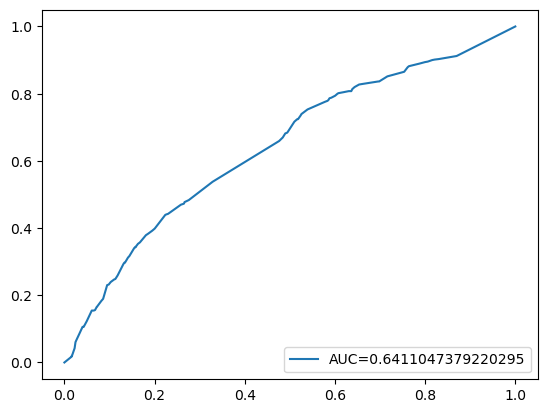

In [39]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

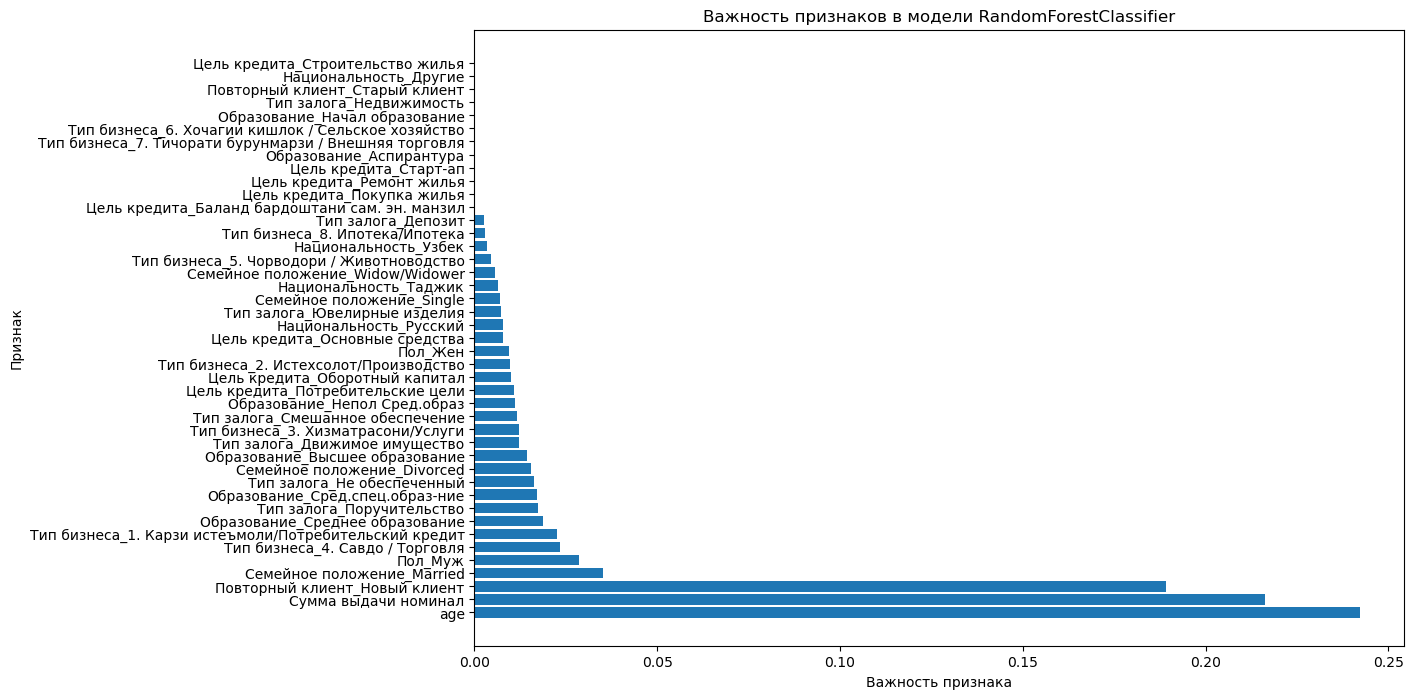

In [40]:
feature_importances = dt.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

In [41]:
combined = pd.DataFrame(dict(actual=y_test , prediction=y_pred_dt))

In [42]:
pd.crosstab(index=combined['actual'] , columns=combined['prediction'])

prediction,0.0,1.0
actual,,
0.0,3486,88
1.0,620,40


In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
threshold = 0.5  
y_pred_prob = dt.predict_proba(X_test)[:, 1]  

y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

ac_adjusted = metrics.accuracy_score(y_test, y_pred_adjusted)
precision = metrics.precision_score(y_test, y_pred_adjusted)
recall = metrics.recall_score(y_test, y_pred_adjusted)
f1_score = metrics.f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_pred_prob)
print ( ac_adjusted ) 
print ( precision ) 
print ( recall ) 
print ( f1_score ) 
print ( auc )

0.8318375059045819
0.31690140845070425
0.06818181818181818
0.11221945137157106
0.6411047379220295


# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svclassifier = SVC ( kernel = 'rbf' , random_state = 49 , C = 1, gamma = 0.01)

In [47]:
svclassifier.fit ( X_train , y_train)

SVC(C=1, gamma=0.01, random_state=49)

In [48]:
y_pred_svc = svclassifier.predict ( X_test )

In [49]:
ac_svc = metrics.accuracy_score( y_test , y_pred_svc)

In [50]:
ac_svc

0.8436466698157771

In [51]:
combined = pd.DataFrame(dict(actual=y_test , prediction=y_pred_svc))

In [52]:
pd.crosstab(index=combined['actual'] , columns=combined['prediction'])

prediction,0.0,1.0
actual,,
0.0,3571,3
1.0,659,1


# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
X_r = data.drop(['Длительность самой долгой единовременной просрочки в течение цикла' , 'default_flg'] , axis=1)
y_r = data['Длительность самой долгой единовременной просрочки в течение цикла']

In [55]:
X_r = pd.get_dummies(X_r, columns=['Пол', 'Семейное положение', 'Национальность', 'Повторный клиент', 'Тип залога', 'Образование', 'Тип бизнеса', 'Цель кредита'])

In [56]:
X_train_r , X_test_r , y_train_r , y_test_r = train_test_split(X_r , y_r , test_size = 0.2 , random_state = 49)

In [57]:
y_r

0        1
1        3
2        4
3        3
4        2
        ..
14148    0
14149    0
14150    0
14151    0
14152    0
Name: Длительность самой долгой единовременной просрочки в течение цикла, Length: 14111, dtype: int64

In [58]:
model = LinearRegression()
model.fit ( X_train_r , y_train_r)

LinearRegression()

In [59]:
y_pred_model = model.predict ( X_test_r)

In [60]:
mse = mean_squared_error(y_test_r , y_pred_model)
r2 = r2_score(y_test_r, y_pred_model)  
print("Mean Squared Error:", mse)  
print("R-Squared:", r2)

Mean Squared Error: 3840.1679801080954
R-Squared: 0.05142372533322781


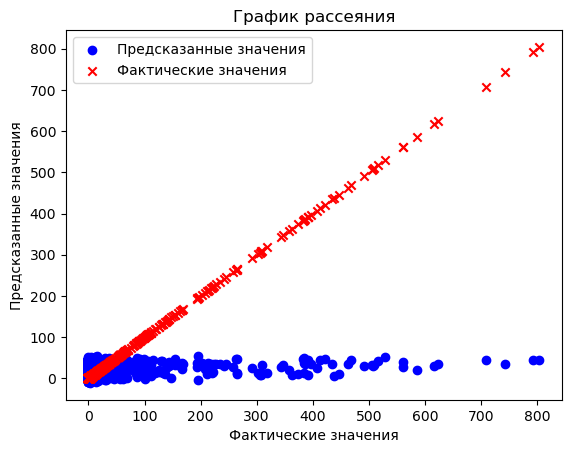

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test_r, y_pred_model, c='blue', label='Предсказанные значения')  # Предсказанные значения в синем цвете
plt.scatter(y_test_r, y_test_r, c='red', marker='x', label='Фактические значения')  # Фактические значения в красном цвете с крестиками
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("График рассеяния")
plt.legend()
plt.show()

# Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42 , max_depth=5)

In [64]:
rf_regressor.fit(X_train_r, y_train_r)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)

In [65]:
y_pred_rf = rf_regressor.predict(X_test_r)

In [66]:
mse = mean_squared_error(y_test_r, y_pred_rf)
r2 = r2_score(y_test_r, y_pred_rf)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)

Mean Squared Error: 3840.3679077115853
R-Squared: 0.05137434036301192


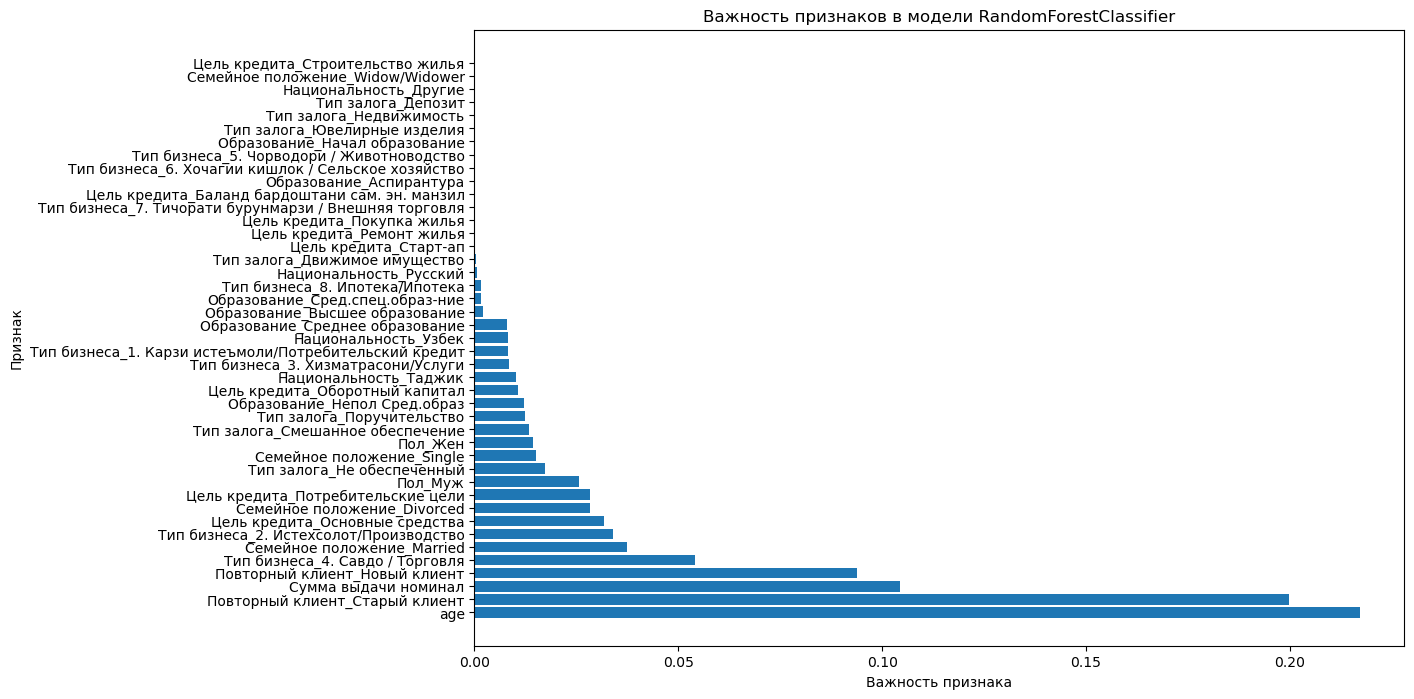

In [67]:
feature_importances = rf_regressor.feature_importances_
feature_names = X_train_r.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

In [68]:
df = pd.concat([X_r, y_r], axis=1)

correlation_matrix = df.corr()
correlation_with_target = df.corrwith(y_r)
print(correlation_with_target)

Сумма выдачи номинал                                                 -0.005283
age                                                                  -0.086530
Пол_Жен                                                              -0.048924
Пол_Муж                                                               0.048924
Семейное положение_Divorced                                           0.039954
Семейное положение_Married                                           -0.079008
Семейное положение_Single                                             0.075066
Семейное положение_Widow/Widower                                     -0.022728
Национальность_Другие                                                -0.002063
Национальность_Русский                                               -0.005847
Национальность_Таджик                                                 0.007134
Национальность_Узбек                                                 -0.005835
Повторный клиент_Новый клиент                       

# Деплоинг 

In [77]:
import pickle

In [78]:
pickle_out = open("ImonDT.pkl" , "wb")

In [79]:
pickle.dump(dt , pickle_out)

In [80]:
pickle_out.close()